In [17]:
import pandas as pd
import os
import additional.add_path as pathes
import additional.add_regr as regr
import additional.add_graphics as graphs

In [18]:
file_path = os.path.join(pathes.output_mri_ct_path, '04_мрт.кт.1_5T.xlsx')
df_90 = pd.read_excel(file_path, sheet_name='04_мрт.кт.1_5T_(HU>60)', header=0)
df_14 = pd.read_excel(file_path, sheet_name='04_мрт.кт.1_5T_(HU>60)_(разница_дней_мрт_кт<=14)', header=0)

In [19]:
df_90.columns, df_14.columns

(Index(['T2*_1.5T_(мс)_protocol', 'c(Fe)_1.5T_(мг/г)_protocol', 'кт_ср_(HU)',
        'разн_дней_мрт_кт', 'диагноз', 'R2*_1.5T_(1/c)_protocol',
        'C(Fe)_1.5T__formula, мг/г'],
       dtype='object'),
 Index(['T2*_1.5T_(мс)_protocol', 'c(Fe)_1.5T_(мг/г)_protocol', 'кт_ср_(HU)',
        'разн_дней_мрт_кт', 'диагноз', 'R2*_1.5T_(1/c)_protocol',
        'C(Fe)_1.5T__formula, мг/г'],
       dtype='object'))

# Распределение по диагнозам

In [20]:
df_90['диагноз'].value_counts()

Приобртенн. апластич. анемия    11
Бета-талассемия (б)              9
Анемия Даймонда- Блэкфана        6
ПИД                              2
Бета-талассемия (п)              2
Идиопатич. апластич. Анемия      1
Онкология                        1
Констит. апластич. анемия        1
Агранулоцитоз                    1
Name: диагноз, dtype: int64

In [21]:
df_14['диагноз'].value_counts()

Бета-талассемия (б)             5
Анемия Даймонда- Блэкфана       4
Приобртенн. апластич. анемия    4
Бета-талассемия (п)             2
Идиопатич. апластич. Анемия     1
Констит. апластич. анемия       1
Агранулоцитоз                   1
Name: диагноз, dtype: int64

In [22]:
# Запись распределение диагнозов в файл
file_path = os.path.join(pathes.output_mri_ct_path, '04_мрт.кт.1_5T_диагнозы.xlsx')
with pd.ExcelWriter(file_path) as writer:
    df_90['диагноз'].value_counts().to_excel(writer, sheet_name='04_мрт.кт.1_5T_диагнозы_90_дней')
    df_14['диагноз'].value_counts().to_excel(writer, sheet_name='04_мрт.кт.1_5T_диагнозы_14_дней')

# Обработка данных

In [23]:
df_90.head(10)

,T2*_1.5T_(мс)_protocol,c(Fe)_1.5T_(мг/г)_protocol,кт_ср_(HU),разн_дней_мрт_кт,диагноз,R2*_1.5T_(1/c)_protocol,"C(Fe)_1.5T__formula, мг/г"
0,9.7,2.8,61.814444,43,Приобртенн. апластич. анемия,103.092784,2.698412
1,4.7,5.6,62.411556,36,Приобртенн. апластич. анемия,212.765957,5.549915
2,8.0,3.4,64.245222,58,Приобртенн. апластич. анемия,125.000000,3.268000
3,4.1,6.2,66.726111,66,Анемия Даймонда- Блэкфана,243.902439,6.359463
4,2.4,10.8,67.430889,7,Анемия Даймонда- Блэкфана,416.666667,10.851333
5,10.3,2.7,68.552111,8,Бета-талассемия (б),97.087379,2.542272
6,10.5,2.6,69.487778,87,Приобртенн. апластич. анемия,95.238095,2.494190
7,3.2,8.2,71.450333,51,Онкология,312.500000,8.143000
8,1.9,13.4,71.544889,80,Приобртенн. апластич. анемия,526.315789,13.702211
9,5.4,14.9,71.705333,4,Агранулоцитоз,185.185185,4.832815


In [24]:
df_14.head(10)

,T2*_1.5T_(мс)_protocol,c(Fe)_1.5T_(мг/г)_protocol,кт_ср_(HU),разн_дней_мрт_кт,диагноз,R2*_1.5T_(1/c)_protocol,"C(Fe)_1.5T__formula, мг/г"
0,2.40,10.8,67.430889,7,Анемия Даймонда- Блэкфана,416.666667,10.851333
1,10.30,2.7,68.552111,8,Бета-талассемия (б),97.087379,2.542272
2,5.40,14.9,71.705333,4,Агранулоцитоз,185.185185,4.832815
3,5.80,4.6,73.401667,7,Констит. апластич. анемия,172.413793,4.500759
4,4.20,6.2,74.771556,6,Приобртенн. апластич. анемия,238.095238,6.208476
5,4.80,5.5,79.484111,1,Приобртенн. апластич. анемия,208.333333,5.434667
6,2.30,11.2,82.644667,7,Бета-талассемия (б),434.782609,11.322348
7,1.12,12.4,84.039111,10,Анемия Даймонда- Блэкфана,892.857143,23.232286
8,1.20,15.5,85.972000,6,Анемия Даймонда- Блэкфана,833.333333,21.684667
9,1.30,20.4,87.336111,7,Бета-талассемия (б),769.230769,20.018000


# Сравнение уравнений регрессий

In [25]:
df_90_comp = regr.comparison_regr_df(df_90['R2*_1.5T_(1/c)_protocol'], df_90['кт_ср_(HU)'])
df_14_comp = regr.comparison_regr_df(df_14['R2*_1.5T_(1/c)_protocol'], df_14['кт_ср_(HU)'])

In [26]:
df_14_comp

,name,eq,std_se,r2,err
2,pow,y = 0.000003 * x^(4.24),215.008747,0.733503,36.592963
1,exp,y = 7.020224 * 1.05^x,221.261931,0.717776,37.293544
0,lin,y = -1678.370 + 26.3*(x),226.801456,0.703467,39.980106
3,hyp,y = 2791.05 * -185876.26/x,250.324080,0.638768,43.277529


In [27]:
df_90_comp

,name,eq,std_se,r2,err
2,pow,y = 0.000011 * x^(3.96),202.922210,0.687710,44.185072
1,exp,y = 7.464924 * 1.05^x,204.074792,0.684152,44.221608
0,lin,y = -1428.671 + 23.5*(x),212.021814,0.659074,57.369937
3,hyp,y = 2333.92 * -147595.10/x,234.945315,0.581368,66.422248


In [28]:
file_path = os.path.join(pathes.output_mri_ct_path,'05_comparison_regression_1.5T.xlsx')
with pd.ExcelWriter(file_path) as writer:
    df_14_comp.to_excel(writer, sheet_name='comparison_1_5T.14_days', index=False)
    df_90_comp.to_excel(writer, sheet_name='comparison_1_5T.90_days', index=False)

# Уравнение линейной регрессии для 1.5T 

Независимая переменная значения HU. 
Зависимая переменная значение концентрации методом МРТ. 

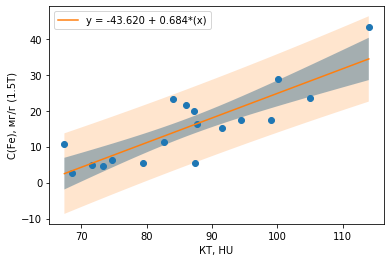

Проверка значимости коээфициента детерминации. Используется F-критерий Фишера.
lin approximation
y = -43.620 + 0.684*(x)
Стандартная ошибка регреесси Se = 5.897
Коэффициент детерминации R2 = 0.70
Средняя относительная ошибка Ei = 39.88

Оценка значимости параметров уравнения регрессии с помощью t-критерия Стьюдента (p=0.01)
Стандартные ошибки параметров линейной регрессии:
std_a = : 9.690. Стандартное отклонение коэффициента регрессии a (y = a+bx, intercept)
std_b = : 0.111. Стандартное отклонение коэффициента регрессии b (y = a+bx, intercept)
t_a = 4.50
t_b = 6.16
t_кр = 2.58 (для односторонней области)
a = -43.62 ± 25.04
Доверительный интервал a = [-68.65, -18.58]
b = 0.68 ± 0.29
Доверительный интервал b = [0.40, 0.97]
Если в границы оценки параметров регресии не попадает 0, то параметры a и b ститистически значимы.

Проверка значимости коээфициента детерминации. Используется F-критерий Фишера (p=0.01).
f > f_кр
Уравнение регрессии признается значимым (нулевая гипотеза отстутсвия свя

In [29]:
y, x = df_14['C(Fe)_1.5T__formula, мг/г'], df_14['кт_ср_(HU)']
file_path = os.path.join(pathes.output_mri_ct_path, '06_lin_regr_c_from_HU_1_5T.svg')
graphs.plot_graph_conf_int_2(y, x, 'lin', x_label='КТ, HU', y_label='C(Fe), мг/г (1.5T)', file_path=file_path)
regr_lin = regr.LinRegression(y, x)
regr_lin.output_description(alpha=0.01)

Оценка доверительных интервалов.

In [30]:
concentr_list = [2, 7, 15]
a = regr_lin.a
b = regr_lin.b
print('a, b:', a, b)
func_c_hu = lambda hu: a + b * hu
func_hu_c = lambda c: (c - a) / b
hu_list = list(map(func_hu_c, concentr_list))
print(hu_list)
hu_up_ind_list = list(map(lambda x: regr_lin.conf_int.get_ind_app_up_x(x), hu_list))
hu_low_ind_list = list(map(lambda x: regr_lin.conf_int.get_ind_app_low_x(x), hu_list))
print(hu_up_ind_list)
print(hu_low_ind_list)

import scipy.optimize as bisect
func_hu_c = lambda x: regr_lin.conf_int.get_ind_app_low_x(x) - 2
hu_concetnr_2 = bisect.bisect(func_hu_c, min(x), max(x))
print('Значение HU_L = {}. При этом значении нижняя граница доверительного интервала равна 2 мг[Fe]/г'.format(hu_concetnr_2))
func_c_hu(hu_concetnr_2), regr_lin.conf_int.get_ind_app_up_x(hu_concetnr_2), regr_lin.conf_int.get_ind_app_low_x(hu_concetnr_2)

a, b: -43.61961586876093 0.6840654090646723
[66.68896755229441, 73.99821010972256, 85.69299820160761]
[13.244528292772033, 17.845916916466617, 25.578126619739553]
[-9.244528292772019, -3.845916916466617, 4.421873380260447]
Значение HU_L = 82.19661247954869. При этом значении нижняя граница доверительного интервала равна 2 мг[Fe]/г


(12.60824347079189, 23.21648694158409, 1.999999999999691)

# Проверка выполнений условий Гаусса-Маркова

1) Оценка. Случайность остаточной компоненты.
Количество поворотных точке p = 13
Значение критических точек p_кр = 7
Остатки имеют случайный характер (p > p_кр)

2) Оценка. M(e_ср) = 0. Равенство нулю  метематического ожидания средней величины остаточной компоненты.
e_ср = 5.82250297358971e-15
t_кр = 1.7396067260750672
t_расч = 4.189158427210897e-15
Оценка средней величины остатков равной нулю ПОДТВЕРЖДАЕТСЯ (t_расч < t_кр)

3) Оценка. Var(e_i) = const. Постоянство дисперсии случайного члена e_i во всех наблюдениях. 

Тест. Голдфелда-Квандта. Goldfeld-Quandt test.
Наблюдается гомоскедатичность отстатков
F_расчетное = 2.79305884722479, F_критическое = 5.050329057632646

Тест ранговой корреляции Спирмена.
t_расч < t_крит. Коффициента ранговой корреляции Спирмена статитстически НЕ значим.
Гетероскедатичность остатков отсутствует.
t_расч = 0.5627638574142455 , t_крит = 2.1199052992210112

4) Оценка. Cov(e_i, e_j)=0, i<>j. Отсутствие автокоррелямции межуд значенимяи  ошибок e_i(остатков рег

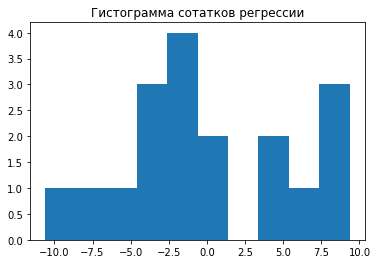

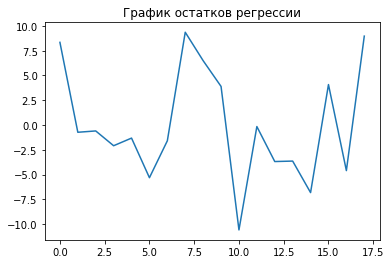

In [31]:
y, x = df_14['C(Fe)_1.5T__formula, мг/г'], df_14['кт_ср_(HU)']

lin_regr = regr.LinRegression(y, x)

gm_condition = regr.Gauss_Markov(y.to_numpy(), lin_regr.y_ap, x.to_numpy())
gm_condition.output_condition_description()
gm_condition.plot_residual()